In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r'C:\Users\91997\Downloads/Mall_Customers.csv', encoding="unicode_escape")

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


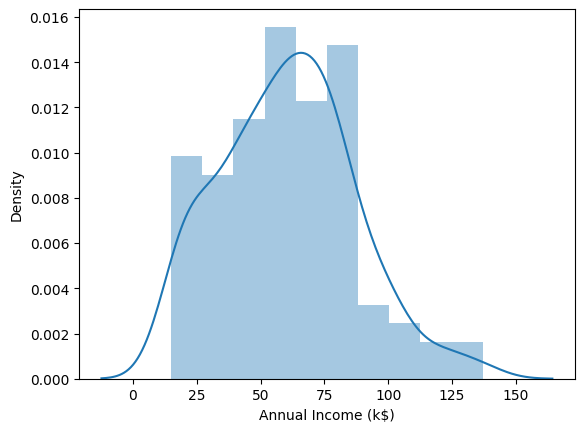

In [10]:
sns.distplot(df['Annual Income (k$)']);

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

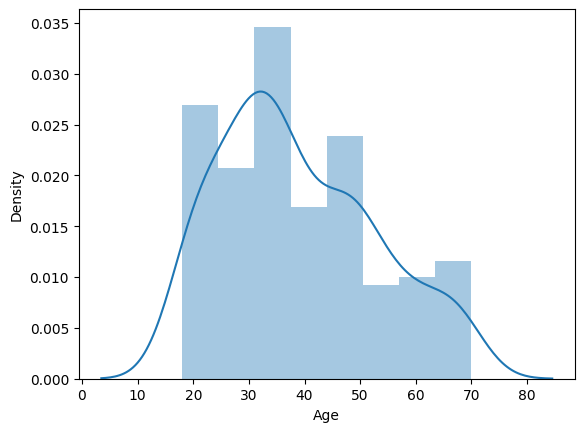

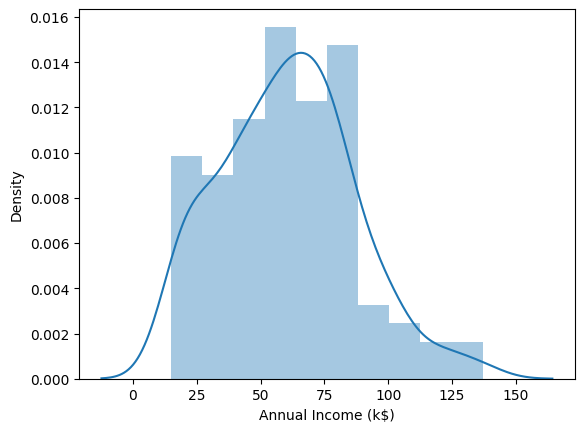

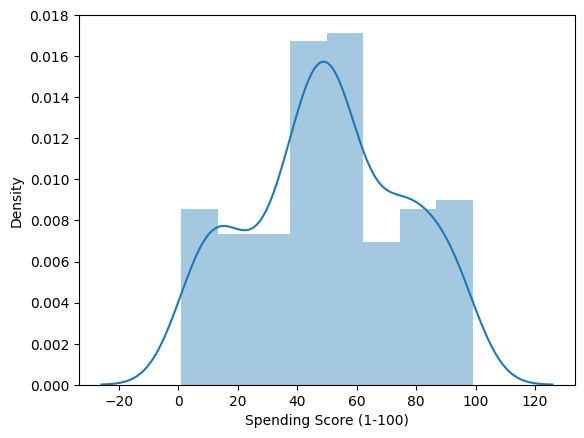

In [12]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

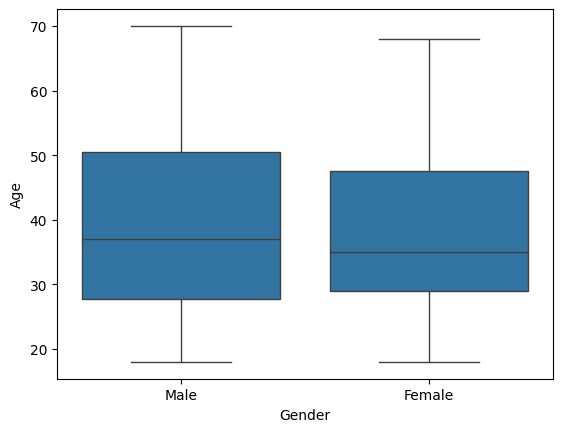

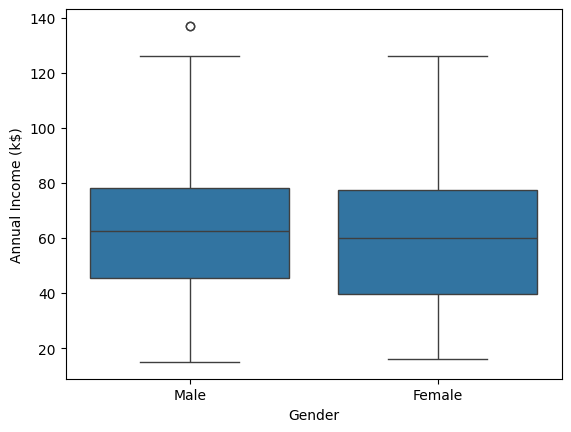

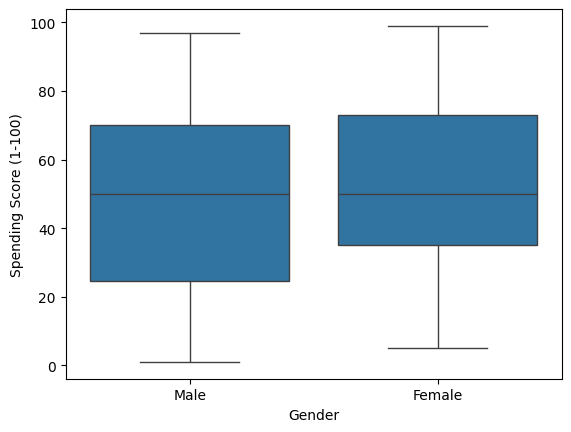

In [18]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [17]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

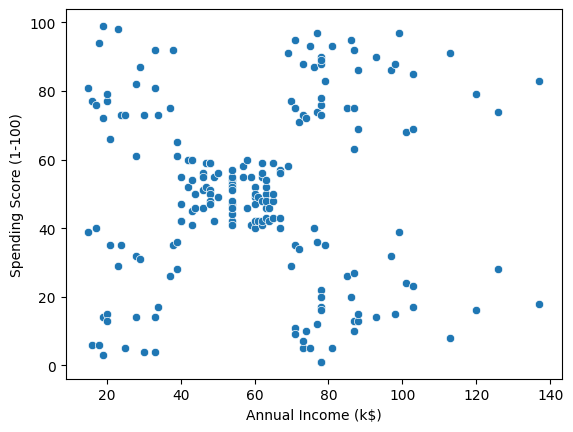

In [19]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

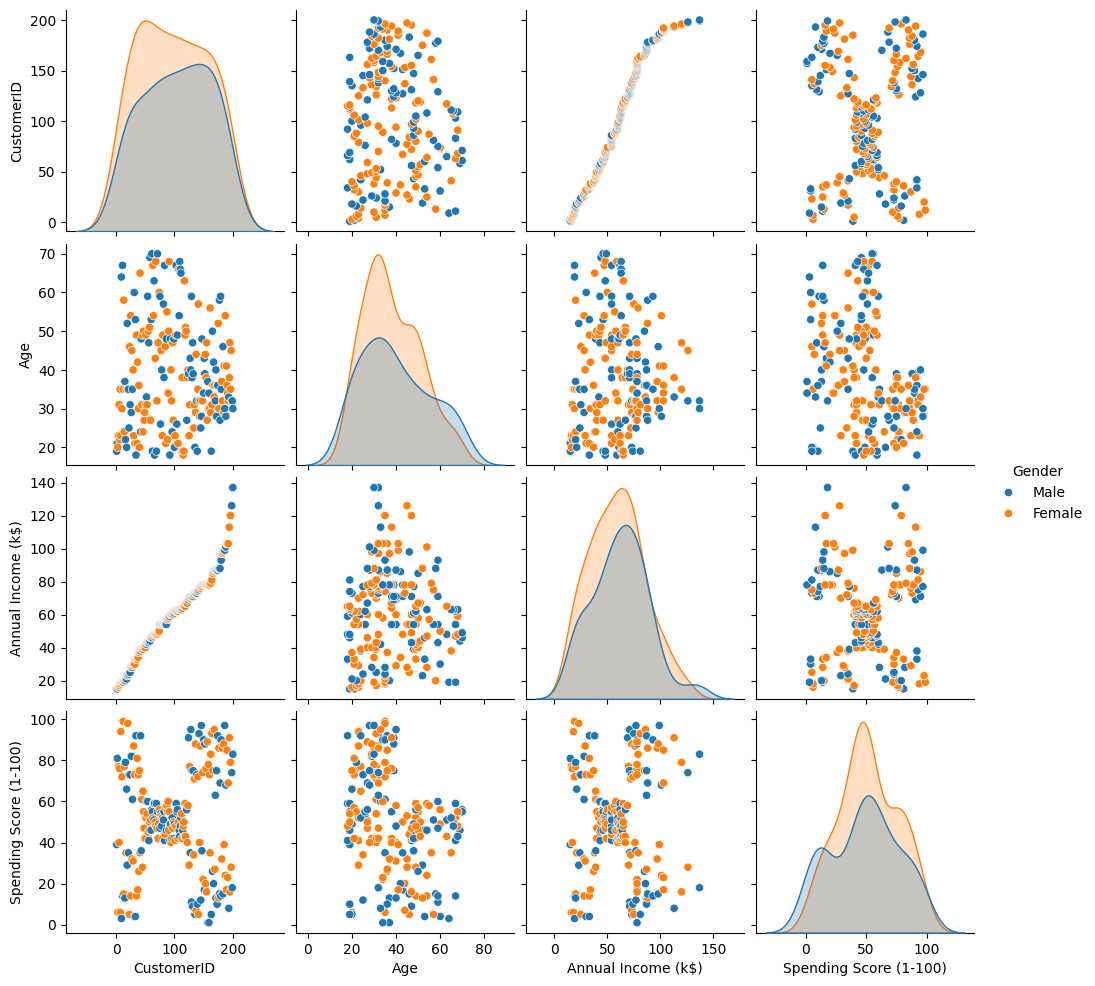

In [20]:
sns.pairplot(df,hue='Gender')

In [24]:
clustering1 = KMeans(n_clusters=3)

In [25]:
clustering1.fit(df[['Annual Income (k$)']])

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [26]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [27]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [28]:
df['Income Cluster'].value_counts()

Income Cluster
2    92
1    72
0    36
Name: count, dtype: int64

In [29]:
clustering1.inertia_

23528.152173913055

In [30]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [31]:
intertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13844.222098218706,
 8684.330924608817,
 5081.484660267269,
 4195.109621458694,
 2897.7750305250306,
 2193.090727573081,
 1948.9341630591634]

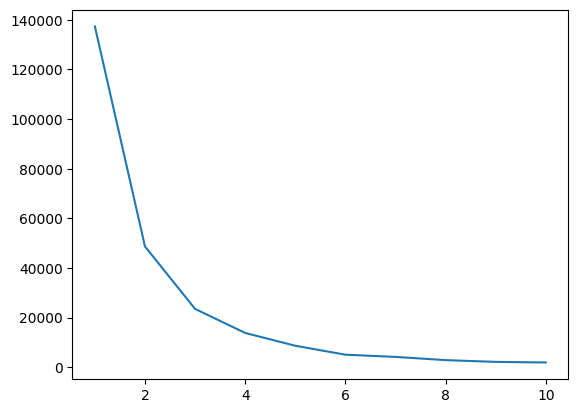

In [32]:
plt.plot(range(1,11),intertia_scores)

In [33]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,3


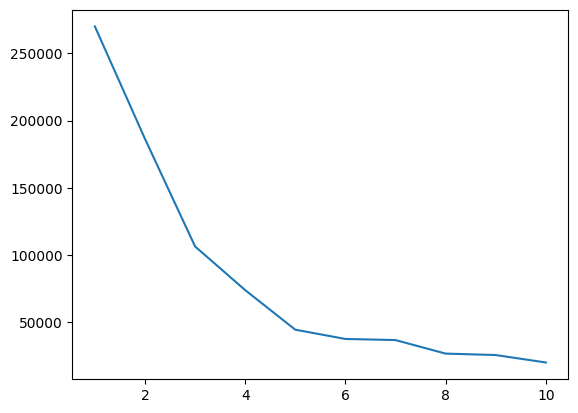

In [34]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [35]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

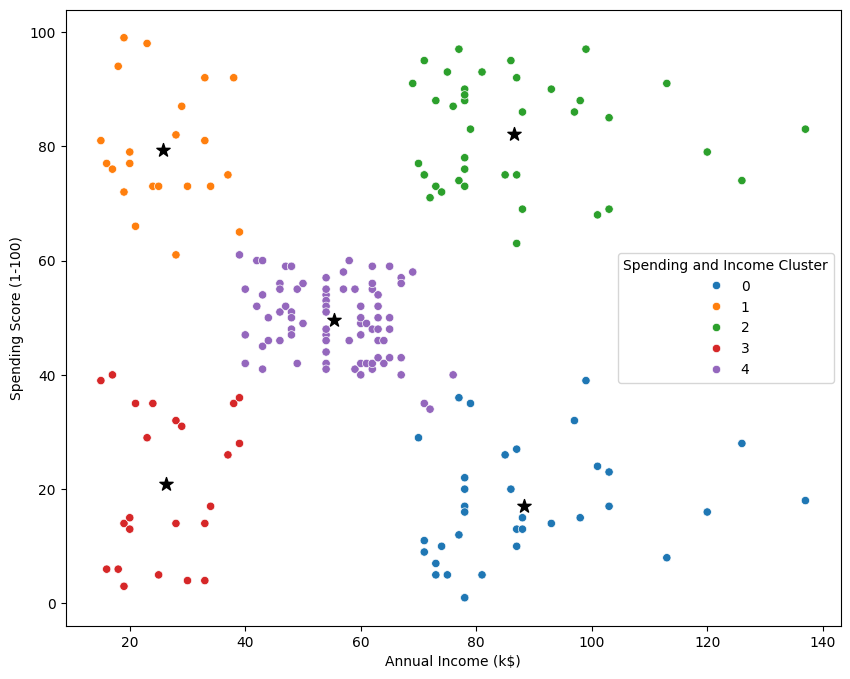

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [37]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.590909,0.409091
2,0.538462,0.461538
3,0.608696,0.391304
4,0.592593,0.407407


In [39]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [41]:
scale = StandardScaler()

In [42]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,3


In [43]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,3,True
1,2,21,15,81,1,1,True
2,3,20,16,6,1,3,False
3,4,23,16,77,1,1,False
4,5,31,17,40,1,3,False


In [44]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [45]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [46]:
dff = scale.fit_transform(dff)

In [47]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


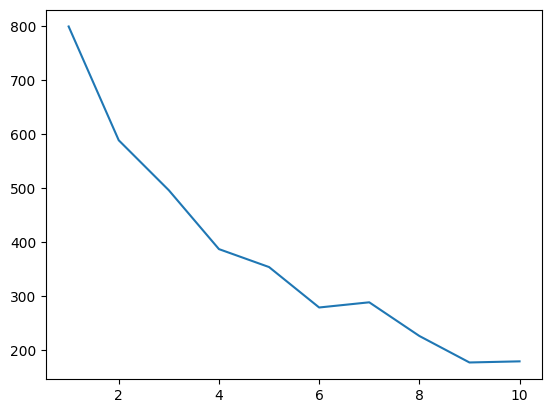

In [48]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [49]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,2
196,197,Female,45,126,28,0,0
197,198,Male,32,126,74,0,2
198,199,Male,32,137,18,0,0


In [50]:
df.to_csv('Clustering.csv')